In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NBASeasonData.csv')
df.head()

,Player,Year,Pos,Age,Tm,G,MP,FG,FGA,3P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Kareem Abdul-Jabbar*,1980,C,32,LAL,82,38.3,10.2,16.9,0.0,...,5.8,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8
1,Tom Abernethy,1980,PF,25,GSW,67,18.2,2.3,4.7,0.0,...,1.2,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4
2,Alvan Adams,1980,C,25,PHO,75,28.9,6.2,11.7,0.0,...,3.1,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9
3,Tiny Archibald*,1980,PG,31,BOS,80,35.8,4.8,9.9,0.1,...,5.4,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1
4,Dennis Awtrey,1980,C,31,CHI,26,21.5,1.0,2.3,0.0,...,1.9,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3


In [3]:
df.loc[df['3PA'] > 0, '3P%'] = df['3P']/df['3PA']
df.loc[df['3PA'] <= 0, '3P%'] = 0
df.loc[df['FGA'] > 0, 'FG%'] = df['FG']/df['FGA']
df.loc[df['FGA'] <= 0, 'FG%'] = 0
df.loc[df['2PA'] > 0, '2P%'] = df['2P']/df['2PA']
df.loc[df['2PA'] <= 0, '2P%'] = 0
df.loc[df['FTA'] > 0, 'FT%'] = df['FT']/df['FTA']
df.loc[df['FTA'] <= 0, 'FT%'] = 0
df.head()

,Player,Year,Pos,Age,Tm,G,MP,FG,FGA,3P,...,AST,STL,BLK,TOV,PF,PTS,3P%,FG%,2P%,FT%
0,Kareem Abdul-Jabbar*,1980,C,32,LAL,82,38.3,10.2,16.9,0.0,...,4.5,1.0,3.4,3.6,2.6,24.8,0.0,0.603550,0.603550,0.758621
1,Tom Abernethy,1980,PF,25,GSW,67,18.2,2.3,4.7,0.0,...,1.3,0.5,0.2,0.6,1.8,5.4,0.0,0.489362,0.489362,0.666667
2,Alvan Adams,1980,C,25,PHO,75,28.9,6.2,11.7,0.0,...,4.3,1.4,0.7,2.9,3.2,14.9,0.0,0.529915,0.534483,0.806452
3,Tiny Archibald*,1980,PG,31,BOS,80,35.8,4.8,9.9,0.1,...,8.4,1.3,0.1,3.0,2.7,14.1,0.5,0.484848,0.484536,0.833333
4,Dennis Awtrey,1980,C,31,CHI,26,21.5,1.0,2.3,0.0,...,1.5,0.5,0.6,1.0,2.5,3.3,0.0,0.434783,0.434783,0.631579


In [11]:
plt.rcParams.update({'font.size': 14})

## Points

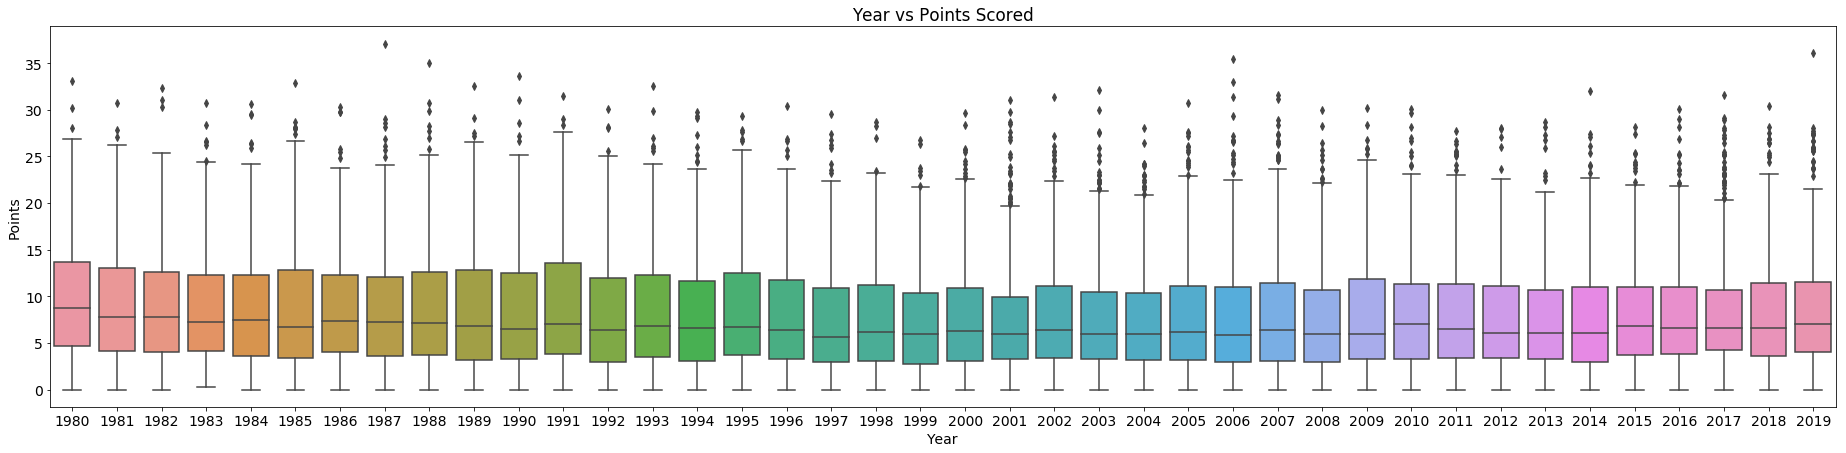

In [13]:
fig, ax = plt.subplots(figsize=(32,7))
plt.title('Year vs Points Scored')
seaborn.boxplot(df['Year'], df['PTS'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()

## Rebounds

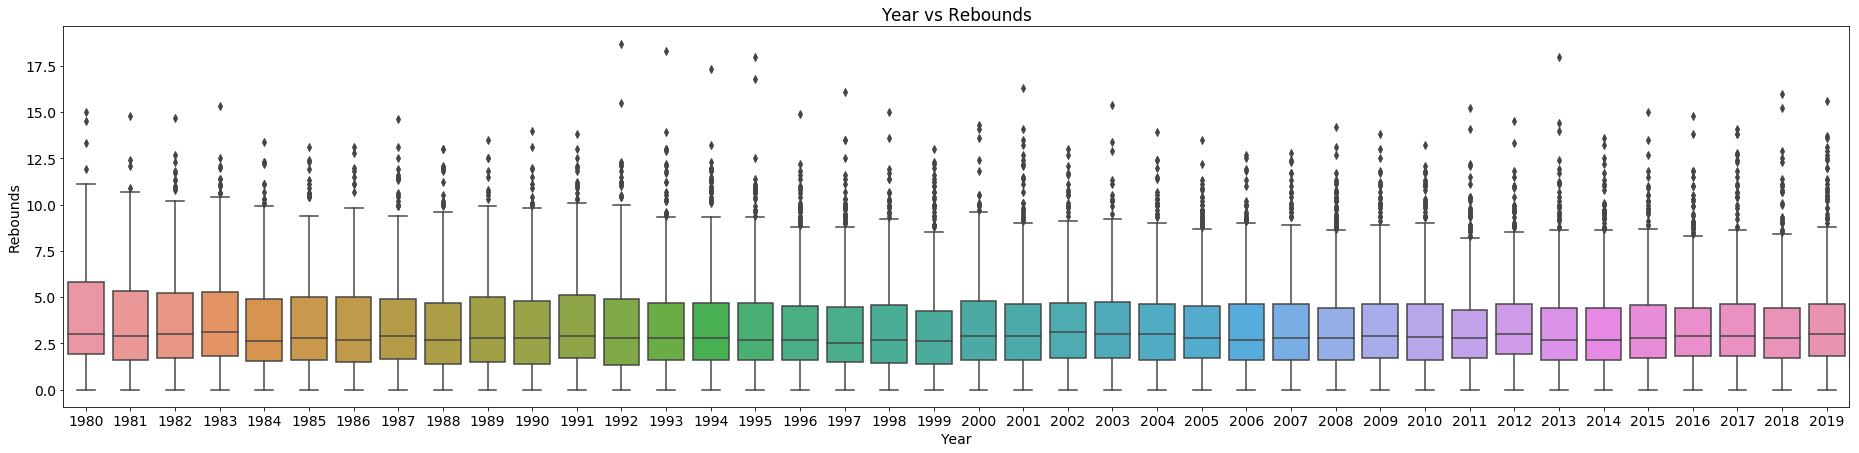

In [14]:
fig, ax = plt.subplots(figsize=(32,7))
plt.title('Year vs Rebounds')
seaborn.boxplot(df['Year'], df['TRB'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Rebounds')
plt.show()

## Assists

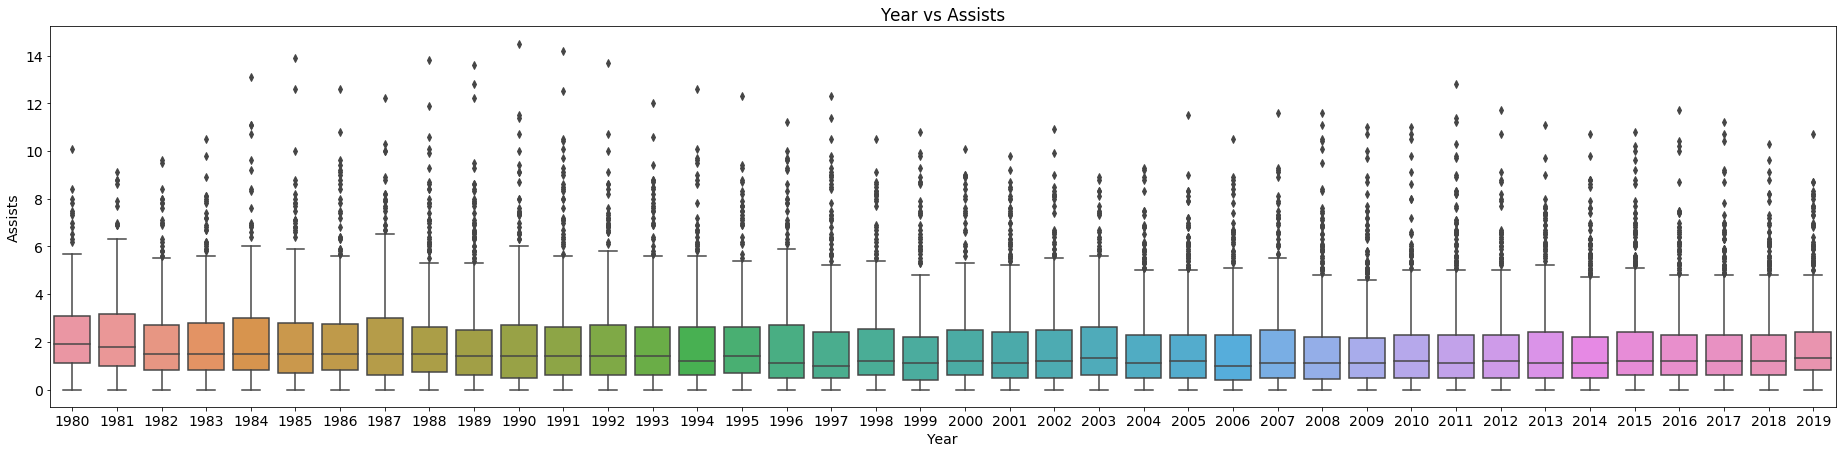

In [15]:
fig, ax = plt.subplots(figsize=(32,7))
plt.title('Year vs Assists')
seaborn.boxplot(df['Year'], df['AST'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Assists')
plt.show()

## The Evolution of the 3 Point Shot

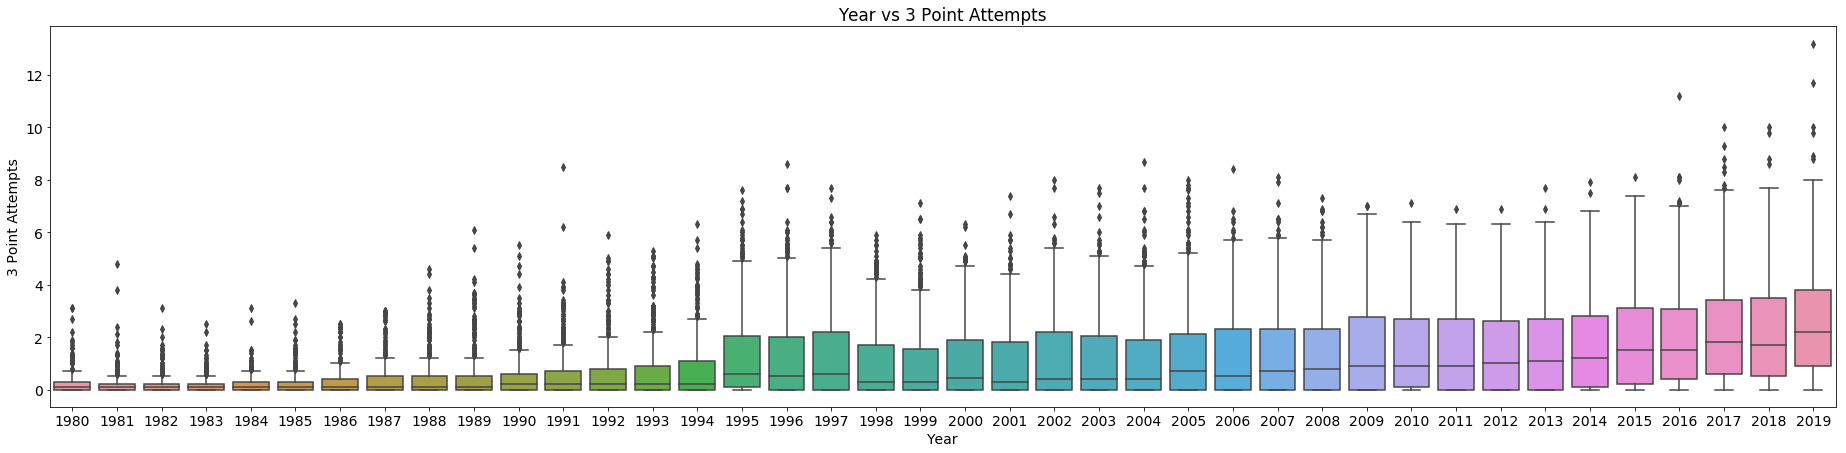

In [16]:
fig, ax = plt.subplots(figsize=(32,7))
plt.title('Year vs 3 Point Attempts')
seaborn.boxplot(df['Year'], df['3PA'], ax=ax)
plt.xlabel('Year')
plt.ylabel('3 Point Attempts')
plt.show()

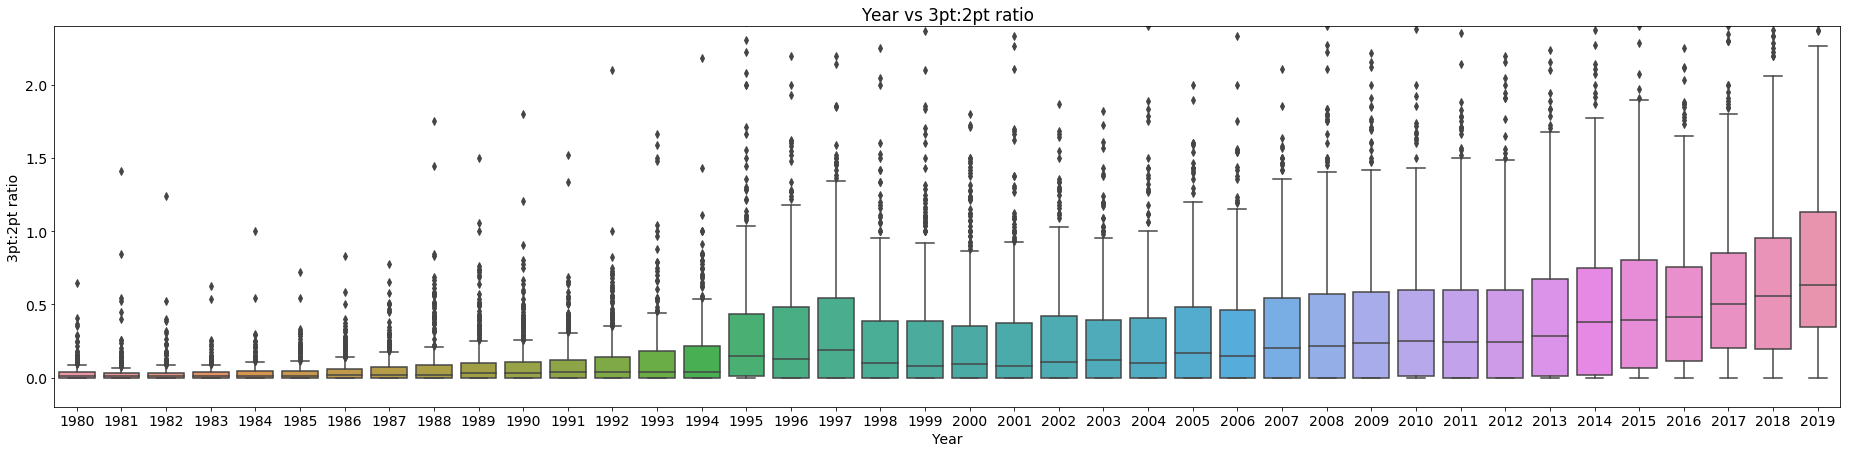

In [19]:
df['ratio'] = df['3PA']/df['2PA']
fig, ax = plt.subplots(figsize=(32,7))
plt.title('Year vs 3pt:2pt ratio')
plt.ylim(-.2, 2.4) 
seaborn.boxplot(df['Year'], df['ratio'], ax=ax)
plt.xlabel('Year')
plt.ylabel('3pt:2pt ratio')
plt.show()

## Fantasy Points

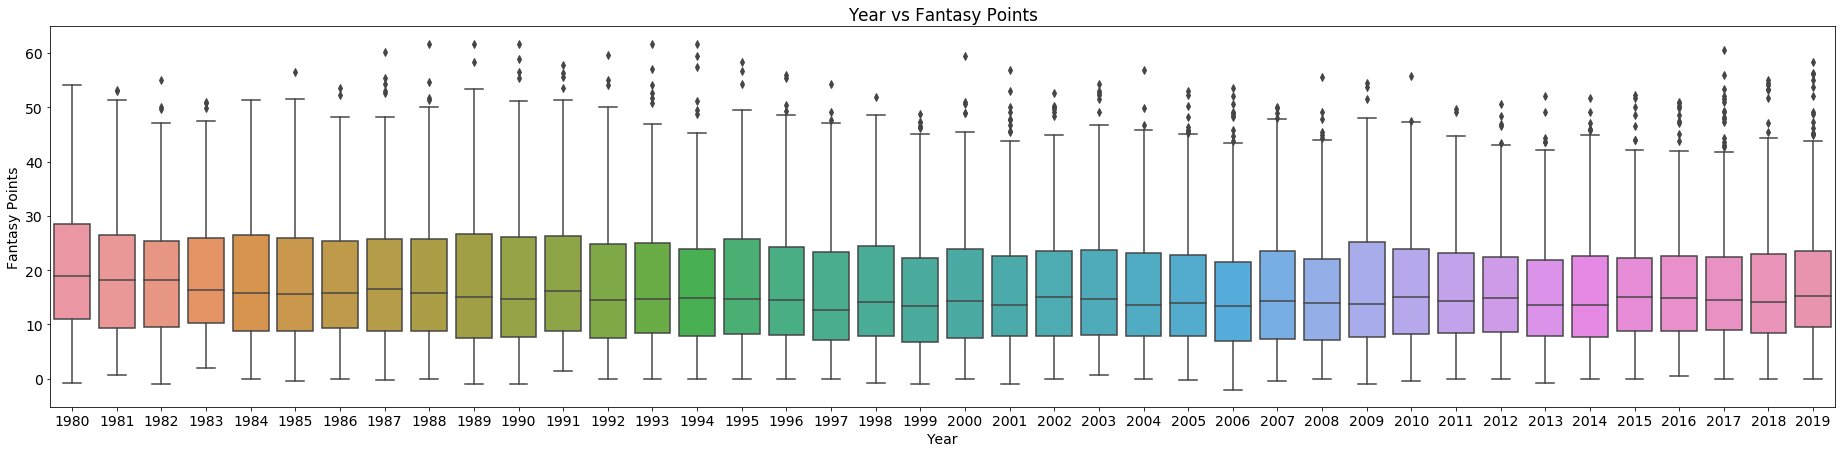

In [20]:
df['Value'] = 1*df['PTS'] + 1.2*df['TRB'] + 1.5*df['AST'] + 3*df['STL'] + 3*df['BLK'] - 1*df['TOV']
fig, ax = plt.subplots(figsize=(32,7))
plt.title('Year vs Fantasy Points')
seaborn.boxplot(df['Year'], df['Value'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Fantasy Points')
plt.show()

In [21]:
df.sort_values('Value', ascending=False)

,Player,Year,Pos,Age,Tm,G,MP,FG,FGA,3P,...,BLK,TOV,PF,PTS,3P%,FG%,2P%,FT%,ratio,Value
3134,Michael Jordan*,1988,SG,24,CHI,82,40.4,13.0,24.4,0.1,...,1.6,3.1,3.3,35.0,0.166667,0.532787,0.548523,0.838095,0.025316,61.75
5455,Hakeem Olajuwon*,1993,C,30,HOU,82,39.5,10.3,19.5,0.0,...,4.2,3.2,3.7,26.1,0.000000,0.528205,0.528205,0.771429,0.005128,61.75
4103,Hakeem Olajuwon*,1990,C,27,HOU,82,38.1,9.8,19.6,0.0,...,4.6,3.9,3.8,24.3,0.000000,0.500000,0.502564,0.723077,0.005128,61.65
5990,David Robinson*,1994,C,28,SAS,80,40.5,10.5,20.7,0.1,...,3.3,3.2,2.9,29.8,0.250000,0.507246,0.509804,0.750000,0.019608,61.64
3561,Michael Jordan*,1989,SG,25,CHI,81,40.2,11.9,22.2,0.3,...,0.8,3.6,3.0,32.5,0.250000,0.536036,0.552381,0.846939,0.057143,61.60
18890,Russell Westbrook,2017,PG,28,OKC,81,34.6,10.2,24.0,2.5,...,0.4,5.4,2.3,31.6,0.347222,0.425000,0.458333,0.846154,0.428571,60.64
2735,Michael Jordan*,1987,SG,23,CHI,82,40.0,13.4,27.8,0.1,...,1.5,3.3,2.9,37.1,0.125000,0.482014,0.488889,0.857143,0.029630,60.14
5059,David Robinson*,1992,C,26,SAS,68,37.7,8.7,15.8,0.0,...,4.5,2.7,3.2,23.2,0.000000,0.550633,0.554140,0.698795,0.006369,59.59
5947,Hakeem Olajuwon*,1994,C,31,HOU,80,41.0,11.2,21.2,0.1,...,3.7,3.4,3.6,27.3,0.500000,0.528302,0.531100,0.720588,0.009569,59.48
9059,Shaquille O'Neal*,2000,C,27,LAL,79,40.0,12.1,21.1,0.0,...,3.0,2.8,3.2,29.7,0.000000,0.573460,0.573460,0.528846,0.000000,59.42
